In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [205]:
def smooth_punishments(punishments, weight, intercept_increment, upper_bound):
    """
    Smooths a list of punishments by iteratively propagating values from higher indices to lower ones.

    Args:
        punishments (list): The original list of punishment values
        weight (float): The smoothing factor to apply

    Returns:
        list: The smoothed list of punishments
    """
    # Create a copy of the list to avoid modifying the original
    result = punishments.copy()

    for i in range(len(result)):
        if i > 0:
            result[i] = result[i] + (weight) * result[i - 1] + intercept_increment
        # Ensure the value does not exceed the upper bound
        result[i] = np.clip(result[i], 0.0, upper_bound[i])
    result = np.clip(result, 0.0, 1.0)
    return result


def increase_punishments(punishments, intercept, slope, num_steps):
    """
    Increases the punishment values based on a linear function defined by intercept and slope.

    Args:
        punishments (list): The original list of punishment values
        intercept (float): The y-intercept of the linear function
        slope (float): The slope of the linear function

    Returns:
        list: The increased list of punishments
    """
    # Create a copy of the list to avoid modifying the original
    result = punishments.copy()

    # Apply the linear function to each element
    for i in range(len(result)):
        result[i] = intercept + slope * i
        result[i] = intercept + ((i) / (2 * num_steps)) ** 1.2

    result = np.clip(result, 0.0, 1.0)
    return result

In [ ]:
def compile_punishment_vals(
    num_steps, num_resources, intercept, slope, weight, intercept_increment, upper_bound
):
    """
    Create the punishment prob arrays.
    """
    punishments = np.zeros(num_steps)
    punishments_start = increase_punishments(punishments, intercept, slope, num_steps)
    punishments_all = np.stack([punishments_start] * num_resources, axis=0)
    punishments_all = smooth_punishments(
        punishments_all, weight, intercept_increment, upper_bound
    )
    return punishments_all

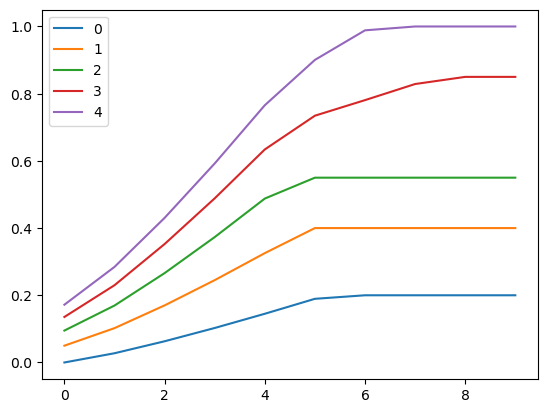

In [206]:
num_resources = 5
num_steps = 10
intercept = 0.0
slope = 0.01
weight = 0.9
intercept_increment = 0.05
upper_bound = [0.2, 0.4, 0.55, 0.85, 1.0]
punishments = np.zeros(num_steps)
punishments_start = increase_punishments(punishments, intercept, slope, num_steps)
punishments_all = np.stack([punishments_start] * num_resources, axis=0)
# print(punishments_all)
punishments_all = smooth_punishments(
    punishments_all, weight, intercept_increment, upper_bound
)
# print(punishments_all)
plt.plot(punishments_all.T, label=[x for x in range(num_resources)])
plt.legend()

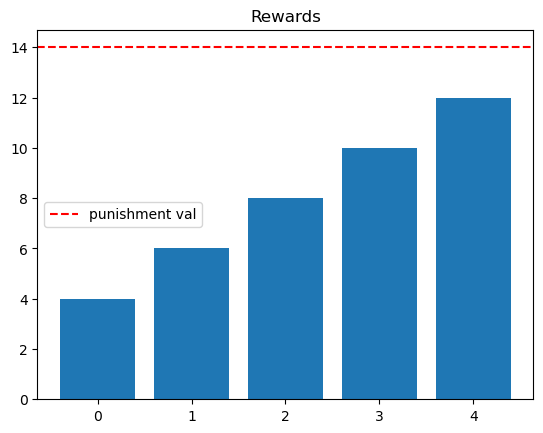

In [209]:
rewards = np.array([4, 6, 8, 10, 12])
plt.bar([x for x in range(num_resources)], rewards)
plt.title("Rewards")
plt.axhline(14, color="red", linestyle="--", label="punishment val")
plt.legend()

(5, 1)


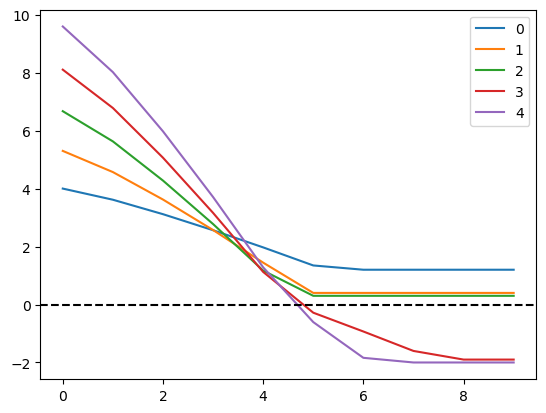

In [210]:
punishments_vals = np.expand_dims(np.repeat(14, num_resources), axis=1)
print(punishments_vals.shape)
expected_vals = (
    -punishments_all * punishments_vals + np.repeat([rewards], num_steps, axis=0).T
)
plt.plot(expected_vals.T, label=[x for x in range(num_resources)])
plt.axhline(0, color="black", linestyle="--")
plt.legend()

five resources, each with a social harm value 
& a punishment prob controlled by smoothness 

two things to vary across resources: intercept and slope

In [105]:
np.repeat([rewards], num_steps, axis=0).shape

(50, 5)